# 極端氣候是否與疾病的擴散有關聯

## 套件引入

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.font_manager as fm

from matplotlib import font_manager

font_dirs = ["/resources/fonts"]
font_files = font_manager.findSystemFonts(fontpaths = font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.sans-serif'] = 'STHeiti'

## 讀取資料集

In [3]:
df = pd.read_csv('database/global_climate_health_impact_tracker_2015_2025.csv')
df.head()
usa_df = df.query("country_code == 'USA'")

## 檢查資料是否有缺或是重複

In [4]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14100 entries, 0 to 14099
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     14100 non-null  int64  
 1   country_code                  14100 non-null  object 
 2   country_name                  14100 non-null  object 
 3   region                        14100 non-null  object 
 4   income_level                  14100 non-null  object 
 5   date                          14100 non-null  object 
 6   year                          14100 non-null  int64  
 7   month                         14100 non-null  int64  
 8   week                          14100 non-null  int64  
 9   latitude                      14100 non-null  float64
 10  longitude                     14100 non-null  float64
 11  population_millions           14100 non-null  int64  
 12  temperature_celsius           14100 non-null  float64
 13  t

np.int64(0)

# PM2.5對降水量的影響

## 資料處理

In [5]:
data_dum = pd.get_dummies(usa_df)
data_amount = (len(usa_df))
xlab = 'pm25_ugm3'
ylab = 'precipitation_mm'
X = pd.get_dummies((usa_df[xlab] - usa_df[xlab].mean()) / usa_df[xlab].std())
Y = pd.get_dummies((usa_df[ylab] - usa_df[ylab].mean()) / usa_df[ylab].std())
# X = data_dum[xlab]
# Y = data_dum[ylab]

## 平均數、變異數、標準差

In [6]:
print(f'{xlab}的最大為{data_dum[xlab].max()}，最小為{data_dum[xlab].min()}')
print(f'{xlab}的平均數為{data_dum[xlab].mean()}')
print(f'{xlab}的變異數為{data_dum[xlab].var()}')
print(f'{xlab}的標準差為{data_dum[xlab].std()}')
print(f'{ylab}的最大為{data_dum[ylab].max()}，最小為{data_dum[ylab].min()}')
print(f'{ylab}的平均數為{data_dum[ylab].mean()}')
print(f'{ylab}的變異數為{data_dum[ylab].var()}')
print(f'{ylab}的標準差為{data_dum[ylab].std()}')

pm25_ugm3的最大為119.4，最小為0.0
pm25_ugm3的平均數為43.09734042553191
pm25_ugm3的變異數為661.663598597937
pm25_ugm3的標準差為25.72282252393654
precipitation_mm的最大為201.5，最小為0.0
precipitation_mm的平均數為82.23049645390071
precipitation_mm的變異數為1754.6538818134866
precipitation_mm的標準差為41.88858892125022


## 直方圖

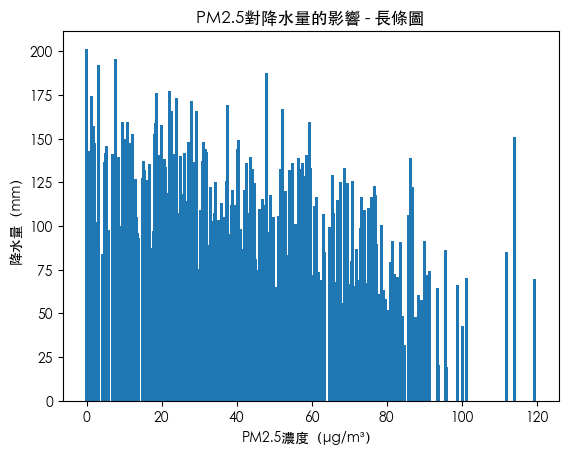

In [7]:
plt.bar(data_dum[xlab], data_dum[ylab])
plt.title('PM2.5對降水量的影響 - 長條圖')
plt.xlabel('PM2.5濃度（µg/m³）')
plt.ylabel('降水量（mm）')
plt.show()

## 相關係數

In [8]:
# X = np.array(data_dum[[xlab]]).reshape(-1)
# Y = np.array(data_dum[[ylab]]).reshape(-1)
X1 = (usa_df[xlab] - usa_df[xlab].mean()) / usa_df[xlab].std()
Y1 = (usa_df[ylab] - usa_df[ylab].mean()) / usa_df[ylab].std()
correlation_matrix = np.corrcoef(X1, Y1)
correlation_value = correlation_matrix[0, 1]
print(f'相關係數為：{correlation_value}')

相關係數為：-0.36184687359531925


## 回歸直線繪製

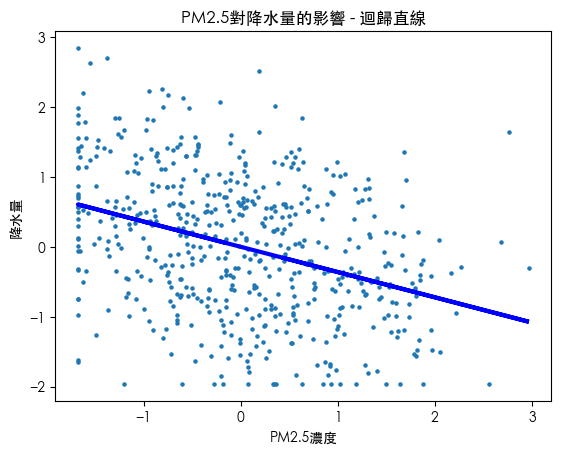

In [9]:
from sklearn import datasets, linear_model
X1 = X1.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)
y = regr.predict(X1)
plt.scatter(X1, Y1, s = 5)
plt.plot(X1, y, color = "blue", linewidth = 3)
plt.title('PM2.5對降水量的影響 - 迴歸直線')
plt.xlabel('PM2.5濃度')
plt.ylabel('降水量')
plt.show()

## Kmeans分群

In [10]:
from sklearn.cluster import KMeans
X = np.column_stack((X1, Y1))
K = 5
kmeans = KMeans(n_clusters = K, random_state = 1, n_init = 'auto').fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.predict)

[0 4 2 4 4 1 4 4 4 4 3 1 1 3 1 1 0 1 1 3 2 3 1 2 1 1 2 1 1 2 0 2 0 0 4 2 4
 0 2 0 0 1 4 2 2 0 0 4 0 2 0 0 0 1 1 0 3 3 4 3 4 3 1 1 3 3 1 4 1 4 1 4 1 2
 3 1 3 4 2 4 1 2 2 2 0 1 0 0 0 0 0 4 2 2 2 0 2 0 2 0 0 4 1 4 1 4 1 1 0 1 3
 1 1 1 4 3 2 3 4 3 3 4 1 3 1 3 1 4 0 4 1 2 0 1 4 2 3 1 0 0 0 1 4 2 2 0 0 1
 2 2 2 0 1 4 0 1 4 4 4 3 3 4 1 2 3 3 1 4 1 1 1 3 1 4 1 1 1 2 3 3 1 1 2 3 1
 0 2 0 2 0 2 2 4 1 2 4 4 0 4 2 2 0 1 4 2 4 0 4 1 0 4 4 0 1 3 1 1 1 2 4 4 3
 1 4 1 3 4 4 3 3 4 4 0 1 1 0 1 1 1 2 4 0 2 2 0 0 2 0 2 0 0 0 4 0 2 0 0 0 0
 1 4 2 3 3 4 4 4 1 1 1 1 3 1 1 1 3 0 1 3 3 4 1 3 1 2 3 0 0 2 2 2 4 2 2 2 2
 4 0 0 2 2 0 0 2 0 0 0 2 0 4 2 0 0 4 2 1 2 3 1 4 4 2 0 4 2 3 3 3 4 1 1 3 4
 1 3 1 4 0 4 2 1 4 4 3 4 4 2 0 2 2 0 0 4 2 2 0 4 1 0 4 0 0 1 0 0 4 1 1 2 0
 1 2 1 1 1 1 4 1 1 1 4 3 1 3 4 4 4 2 2 4 1 4 2 2 0 2 2 2 0 2 4 0 0 4 0 0 1
 1 0 1 2 3 1 4 2 4 1 0 4 2 1 3 3 3 1 4 1 4 1 3 3 3 3 3 3 3 4 4 1 1 1 4 1 2
 4 0 3 2 0 4 2 2 2 2 0 2 0 0 2 0 1 1 0 4 0 2 4 2 4 0 2 4 0 2 4 1 3 1 4 1 3
 3 3 1 1 4 3 4 1 4 3 1 1 

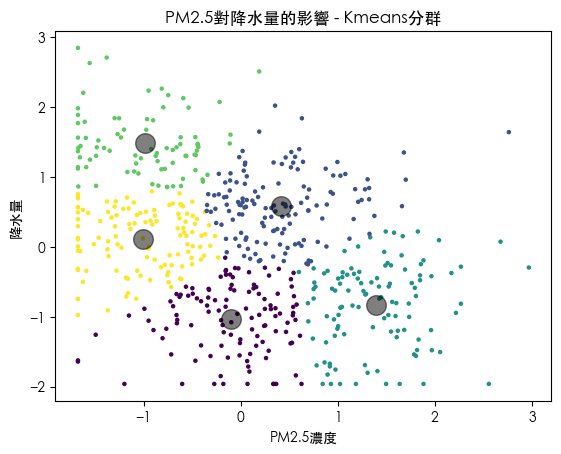

In [11]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.predict(X), s = 5, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.title('PM2.5對降水量的影響 - Kmeans分群')
plt.xlabel('PM2.5濃度')
plt.ylabel('降水量')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);
plt.show()

# 降水量對蟲煤疾病傳染的影響

## 資料處理

In [49]:
data_dum = pd.get_dummies(usa_df)
data_amount = (len(usa_df))
xlab = 'precipitation_mm'
ylab = 'vector_disease_risk_score'
X = pd.get_dummies((usa_df[xlab] - usa_df[xlab].mean()) / usa_df[xlab].std())
Y = pd.get_dummies((usa_df[ylab] - usa_df[ylab].mean()) / usa_df[ylab].std())
# X = data_dum[xlab]
# Y = data_dum[ylab]

## 蟲煤疾病傳播率往後位移一星期並將第一個值進行中位數補值

In [50]:
Y_mid = np.median(Y)
Y = np.roll(Y, shift = 1, axis = 0)
Y[0] = Y_mid

## 平均數、中位數、變異數、標準差

In [51]:
print(f'{xlab}的最大為{data_dum[xlab].max()}，最小為{data_dum[xlab].min()}')
print(f'{xlab}的平均數為{data_dum[xlab].mean()}')
print(f'{xlab}的變異數為{data_dum[xlab].var()}')
print(f'{xlab}的標準差為{data_dum[xlab].std()}')
print(f'{ylab}的最大為{data_dum[ylab].max()}，最小為{data_dum[ylab].min()}')
print(f'{ylab}的平均數為{data_dum[ylab].mean()}')
print(f'{ylab}的變異數為{data_dum[ylab].var()}')
print(f'{ylab}的標準差為{data_dum[ylab].std()}')

precipitation_mm的最大為201.5，最小為0.0
precipitation_mm的平均數為82.23049645390071
precipitation_mm的變異數為1754.6538818134866
precipitation_mm的標準差為41.88858892125022
vector_disease_risk_score的最大為14.3，最小為0.0
vector_disease_risk_score的平均數為5.235460992907802
vector_disease_risk_score的變異數為8.255116838617829
vector_disease_risk_score的標準差為2.8731719124719683


## 直方圖

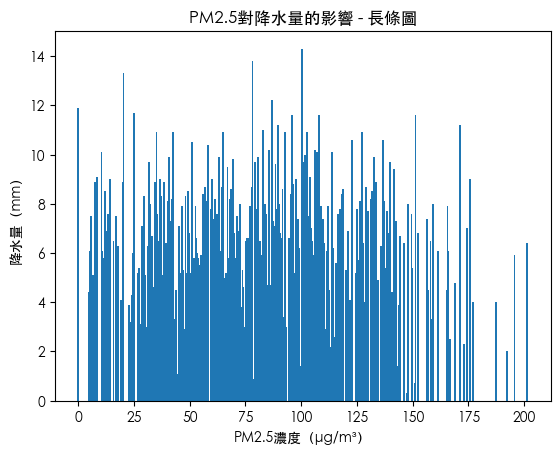

In [52]:
plt.bar(data_dum[xlab], data_dum[ylab])
plt.title('PM2.5對降水量的影響 - 長條圖')
plt.xlabel('PM2.5濃度（µg/m³）')
plt.ylabel('降水量（mm）')
plt.show()

## 相關係數

In [53]:
# X = np.array(data_dum[[xlab]]).reshape(-1)
# Y = np.array(data_dum[[ylab]]).reshape(-1)
X1 = (usa_df[xlab] - usa_df[xlab].mean()) / usa_df[xlab].std()
Y1 = (usa_df[ylab] - usa_df[ylab].mean()) / usa_df[ylab].std()
correlation_matrix = np.corrcoef(X1, Y1)
correlation_value = correlation_matrix[0, 1]
print(f'相關係數為：{correlation_value}')

相關係數為：-0.017130761528660433


## 回歸圖繪製

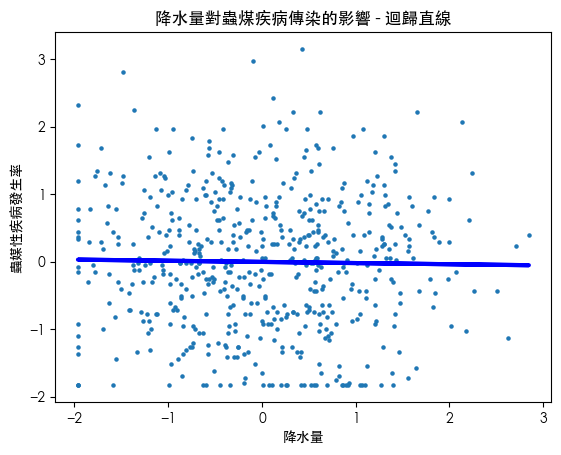

In [54]:
from sklearn import datasets, linear_model
X1 = X1.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)
y = regr.predict(X1)
plt.scatter(X1, Y1, s = 5)
plt.plot(X1, y, color = "blue", linewidth = 3)
plt.title('降水量對蟲煤疾病傳染的影響 - 迴歸直線')
plt.xlabel('降水量')
plt.ylabel('蟲媒性疾病發生率')
plt.show()

## Kmeans分群

In [55]:
from sklearn.cluster import KMeans
X = np.column_stack((X1, Y1))
K = 5
kmeans = KMeans(n_clusters = K, random_state = 1, n_init = 'auto').fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.predict)

[1 1 2 1 2 2 1 1 1 2 3 3 2 3 3 3 2 2 1 3 1 3 1 2 1 2 0 1 1 1 0 4 0 0 1 4 1
 4 4 0 4 2 0 0 4 0 4 0 4 0 4 4 0 2 2 4 3 3 1 3 1 3 1 2 3 3 3 1 2 1 2 1 1 1
 3 1 3 1 4 1 2 4 2 0 4 2 4 4 4 2 4 2 0 4 4 4 0 4 4 4 4 4 1 0 2 2 1 1 0 2 3
 3 2 1 1 3 4 3 2 3 2 0 1 3 3 2 2 1 4 1 1 1 4 4 1 4 3 2 4 0 4 2 1 4 4 0 4 2
 2 0 2 4 2 4 4 2 2 1 4 3 3 1 2 2 3 3 1 1 3 3 3 3 2 2 1 2 2 0 3 3 1 2 0 1 3
 4 4 0 2 4 0 4 0 2 4 4 2 4 2 0 0 4 1 1 4 4 4 2 1 0 1 1 4 0 3 3 1 1 1 0 2 3
 2 2 1 3 1 1 3 2 1 2 4 1 2 0 1 1 1 4 0 4 0 4 4 4 0 0 4 4 0 0 1 4 0 0 4 4 0
 3 2 0 3 3 1 1 1 2 3 1 1 1 1 3 3 2 4 1 3 2 1 2 2 1 0 3 4 1 2 0 0 1 0 0 4 0
 1 4 4 4 4 0 4 0 4 0 4 4 0 4 2 4 4 0 2 1 4 2 3 2 1 4 2 2 0 3 3 3 1 2 1 3 2
 2 3 2 1 4 2 2 1 2 1 3 4 1 4 4 0 4 4 4 2 4 4 4 0 2 4 0 4 0 4 4 0 1 1 3 4 0
 0 0 2 3 3 2 1 2 1 1 1 2 0 3 0 1 1 1 4 2 2 2 4 4 0 1 4 4 4 4 2 4 0 4 0 4 1
 2 0 2 4 1 2 0 4 0 1 0 1 4 4 3 2 3 3 1 3 2 1 2 2 3 3 3 3 3 0 1 1 0 2 1 2 1
 2 4 2 0 4 2 4 4 4 4 4 2 0 4 4 0 2 1 4 2 0 4 1 4 0 2 1 0 4 0 2 1 2 2 2 1 3
 3 3 3 2 2 3 2 1 1 3 2 2 

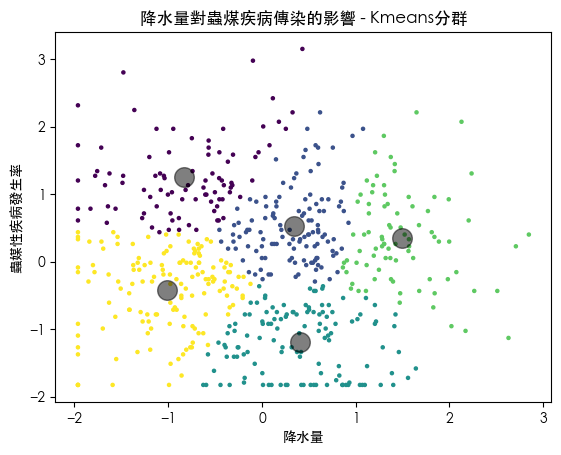

In [56]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.predict(X), s = 5, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.title('降水量對蟲煤疾病傳染的影響 - Kmeans分群')
plt.xlabel('降水量')
plt.ylabel('蟲媒性疾病發生率')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);
plt.show()

# PM2.5對呼吸道疾病的影響

## 資料處理

In [67]:
data_dum = pd.get_dummies(usa_df)
data_amount = (len(usa_df))
xlab = 'pm25_ugm3'
ylab = 'respiratory_disease_rate'
X = pd.get_dummies((usa_df[xlab] - usa_df[xlab].mean()) / usa_df[xlab].std())
Y = pd.get_dummies((usa_df[ylab] - usa_df[ylab].mean()) / usa_df[ylab].std())
# X = data_dum[xlab]
# Y = data_dum[ylab]

## 平均數、變異數、標準差

In [68]:
print(f'{xlab}的最大為{data_dum[xlab].max()}，最小為{data_dum[xlab].min()}')
print(f'{xlab}的平均數為{data_dum[xlab].mean()}')
print(f'{xlab}的變異數為{data_dum[xlab].var()}')
print(f'{xlab}的標準差為{data_dum[xlab].std()}')
print(f'{ylab}的最大為{data_dum[ylab].max()}，最小為{data_dum[ylab].min()}')
print(f'{ylab}的平均數為{data_dum[ylab].mean()}')
print(f'{ylab}的變異數為{data_dum[ylab].var()}')
print(f'{ylab}的標準差為{data_dum[ylab].std()}')

pm25_ugm3的最大為119.4，最小為0.0
pm25_ugm3的平均數為43.09734042553191
pm25_ugm3的變異數為661.663598597937
pm25_ugm3的標準差為25.72282252393654
respiratory_disease_rate的最大為97.3，最小為29.0
respiratory_disease_rate的平均數為62.570035460992905
respiratory_disease_rate的變異數為163.80384298275467
respiratory_disease_rate的標準差為12.798587538582321


## 直方圖

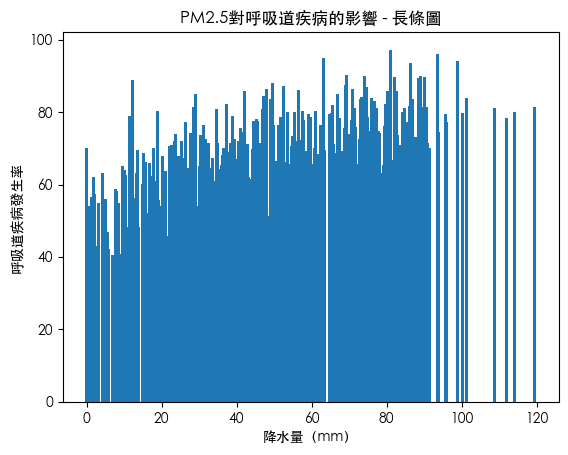

In [69]:
plt.bar(data_dum[xlab], data_dum[ylab])
plt.title('PM2.5對呼吸道疾病的影響 - 長條圖')
plt.xlabel('降水量（mm）')
plt.ylabel('呼吸道疾病發生率')
plt.show()

## 相關係數

In [70]:
# X = np.array(data_dum[[xlab]]).reshape(-1)
# Y = np.array(data_dum[[ylab]]).reshape(-1)
X1 = (usa_df[xlab] - usa_df[xlab].mean()) / usa_df[xlab].std()
Y1 = (usa_df[ylab] - usa_df[ylab].mean()) / usa_df[ylab].std()
correlation_matrix = np.corrcoef(X1, Y1)
correlation_value = correlation_matrix[0, 1]
print(f'相關係數為：{correlation_value}')

相關係數為：0.6047931289502829


## 回歸直線繪製

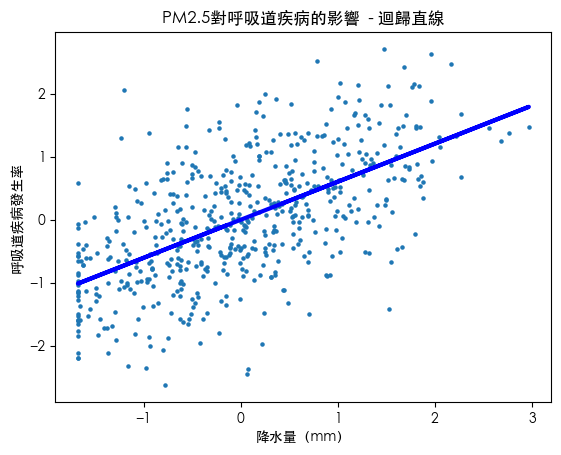

In [71]:
from sklearn import datasets, linear_model
X1 = X1.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)
y = regr.predict(X1)
plt.scatter(X1, Y1, s = 5)
plt.plot(X1, y, color = "blue", linewidth = 3)
plt.title('PM2.5對呼吸道疾病的影響  - 迴歸直線')
plt.xlabel('降水量（mm）')
plt.ylabel('呼吸道疾病發生率')
plt.show()

## Kmeans分群

In [73]:
from sklearn.cluster import KMeans
X = np.column_stack((X1, Y1))
K = 5
kmeans = KMeans(n_clusters = K, random_state = 1, n_init = 'auto').fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.predict)

[0 3 2 1 3 2 0 1 0 3 3 4 4 1 4 2 0 4 4 3 2 4 0 4 4 4 2 0 4 4 0 4 3 3 3 2 3
 0 4 0 3 2 3 2 2 0 1 1 4 4 3 1 0 4 2 1 3 3 1 4 1 0 3 0 3 0 2 3 0 1 4 1 4 2
 1 4 3 3 2 3 4 4 2 2 4 4 4 4 0 4 0 3 2 2 4 4 2 4 2 3 4 1 2 1 4 3 0 4 0 2 1
 0 4 2 1 3 2 3 3 3 1 3 2 3 2 0 0 3 0 3 4 2 3 4 3 2 3 4 0 3 4 4 3 2 2 0 0 4
 4 4 2 0 4 3 0 4 1 3 3 1 1 3 4 2 3 3 0 1 4 0 0 3 4 1 4 4 4 2 1 1 2 0 2 1 4
 0 2 4 2 0 2 4 3 0 2 3 1 4 3 2 2 0 0 1 2 1 4 1 4 0 3 1 4 4 3 4 4 0 2 3 3 3
 4 3 4 3 3 0 1 0 3 1 4 3 4 0 0 4 4 2 3 3 2 2 3 0 2 0 4 0 0 4 3 0 2 4 0 1 4
 4 1 4 1 1 3 1 3 2 4 4 4 3 0 4 4 3 1 4 0 3 1 2 0 0 2 0 4 0 4 2 2 1 2 4 2 0
 1 4 0 2 2 0 0 2 4 4 3 2 1 3 2 0 4 0 2 4 2 1 0 1 1 2 4 3 2 3 1 1 3 4 0 1 0
 3 3 0 0 4 0 2 3 1 3 1 3 3 2 3 2 2 4 0 1 2 4 0 3 0 4 3 1 1 4 3 4 3 3 4 2 3
 4 4 4 0 0 4 1 0 1 0 1 3 0 1 3 3 3 2 2 1 4 1 2 4 4 4 4 2 0 2 1 1 1 1 0 0 4
 4 1 4 2 0 1 1 2 3 4 0 3 4 4 1 3 3 0 1 2 3 4 1 3 3 3 1 1 1 3 1 4 0 0 1 1 2
 1 0 3 2 3 3 2 2 4 2 3 0 1 3 2 4 4 4 0 0 0 4 0 4 3 4 2 1 4 4 1 4 1 4 1 4 1
 1 3 4 0 1 1 1 4 3 3 4 3 

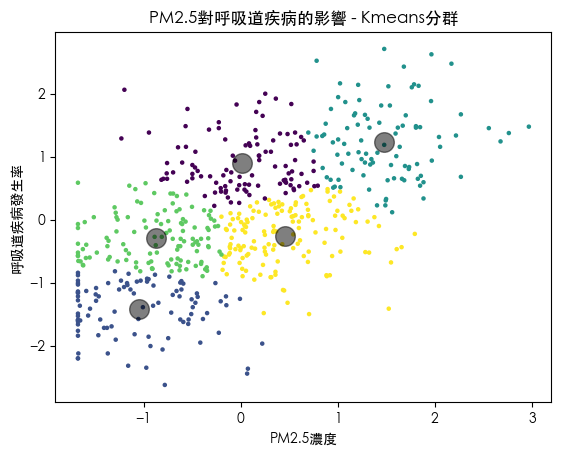

In [74]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.predict(X), s = 5, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.title('PM2.5對呼吸道疾病的影響 - Kmeans分群')
plt.xlabel('PM2.5濃度')
plt.ylabel('呼吸道疾病發生率')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);
plt.show()

# 降水量對水煤疾病的影響

## 資料處理

In [57]:
data_dum = pd.get_dummies(usa_df)
data_amount = (len(usa_df))
xlab = 'precipitation_mm'
ylab = 'waterborne_disease_incidents'
X = pd.get_dummies((usa_df[xlab] - usa_df[xlab].mean()) / usa_df[xlab].std())
Y = pd.get_dummies((usa_df[ylab] - usa_df[ylab].mean()) / usa_df[ylab].std())
# X = data_dum[xlab]
# Y = data_dum[ylab]

## 平均數、變異數、標準差

In [58]:
print(f'{xlab}的最大為{data_dum[xlab].max()}，最小為{data_dum[xlab].min()}')
print(f'{xlab}的平均數為{data_dum[xlab].mean()}')
print(f'{xlab}的變異數為{data_dum[xlab].var()}')
print(f'{xlab}的標準差為{data_dum[xlab].std()}')
print(f'{ylab}的最大為{data_dum[ylab].max()}，最小為{data_dum[ylab].min()}')
print(f'{ylab}的平均數為{data_dum[ylab].mean()}')
print(f'{ylab}的變異數為{data_dum[ylab].var()}')
print(f'{ylab}的標準差為{data_dum[ylab].std()}')

precipitation_mm的最大為201.5，最小為0.0
precipitation_mm的平均數為82.23049645390071
precipitation_mm的變異數為1754.6538818134866
precipitation_mm的標準差為41.88858892125022
waterborne_disease_incidents的最大為49.8，最小為1.9
waterborne_disease_incidents的平均數為18.382978723404257
waterborne_disease_incidents的變異數為30.24667246135825
waterborne_disease_incidents的標準差為5.499697488167713


## 直方圖

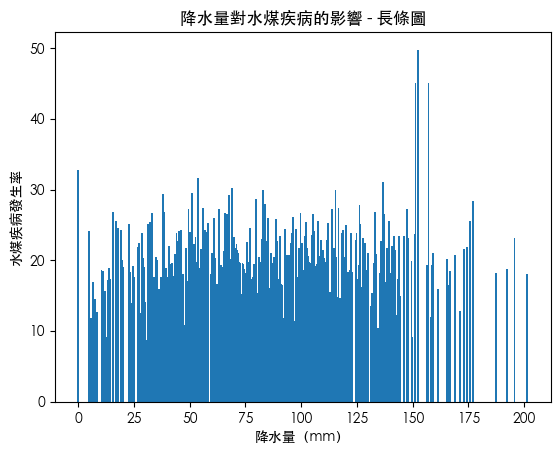

In [60]:
plt.bar(data_dum[xlab], data_dum[ylab])
plt.title('降水量對水煤疾病的影響 - 長條圖')
plt.xlabel('降水量（mm）')
plt.ylabel('水煤疾病發生率')
plt.show()

## 相關係數

In [61]:
# X = np.array(data_dum[[xlab]]).reshape(-1)
# Y = np.array(data_dum[[ylab]]).reshape(-1)
X1 = (usa_df[xlab] - usa_df[xlab].mean()) / usa_df[xlab].std()
Y1 = (usa_df[ylab] - usa_df[ylab].mean()) / usa_df[ylab].std()
correlation_matrix = np.corrcoef(X1, Y1)
correlation_value = correlation_matrix[0, 1]
print(f'相關係數為：{correlation_value}')

相關係數為：0.03921633154720938


## 回歸直線繪製

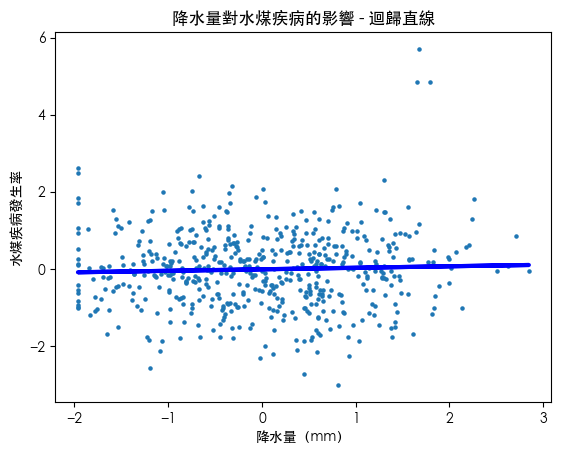

In [62]:
from sklearn import datasets, linear_model
X1 = X1.values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)
y = regr.predict(X1)
plt.scatter(X1, Y1, s = 5)
plt.plot(X1, y, color = "blue", linewidth = 3)
plt.title('降水量對水煤疾病的影響 - 迴歸直線')
plt.xlabel('降水量（mm）')
plt.ylabel('水煤疾病發生率')
plt.show()

## Kmeans分群

In [63]:
from sklearn.cluster import KMeans
X = np.column_stack((X1, Y1))
K = 5
kmeans = KMeans(n_clusters = K, random_state = 1, n_init = 'auto').fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.predict)

[3 1 3 1 0 2 2 3 3 3 1 2 2 2 2 2 4 2 3 2 3 1 3 0 1 3 4 3 3 0 0 4 4 0 3 4 3
 4 4 4 0 1 3 4 4 4 4 0 4 4 4 4 4 1 3 0 2 1 2 2 3 2 3 1 2 2 2 1 2 3 1 3 3 3
 2 3 2 3 4 3 3 4 0 4 4 1 1 0 4 0 4 1 4 0 3 0 0 4 4 4 4 4 1 0 3 1 3 3 4 2 2
 2 3 1 3 2 4 2 3 2 2 1 3 2 2 3 3 3 0 3 1 3 0 3 1 0 2 3 4 4 4 1 1 4 0 4 4 3
 0 0 3 4 1 3 0 2 1 3 4 2 2 1 3 3 2 2 2 3 1 1 2 2 3 2 1 3 0 0 2 2 3 1 4 2 1
 0 3 4 3 0 4 4 4 3 4 0 0 0 0 0 0 0 1 3 4 0 0 1 1 4 4 3 0 3 1 2 2 1 3 4 4 2
 1 3 3 2 3 3 2 2 1 3 4 1 3 4 3 1 3 0 3 4 4 4 0 4 4 4 4 4 0 4 3 4 0 4 4 4 4
 1 3 4 2 2 3 1 0 2 2 3 3 1 1 2 3 2 3 2 2 1 1 1 2 1 4 2 0 3 0 0 4 1 4 4 0 0
 1 4 0 4 0 4 4 4 4 4 0 0 4 0 4 0 4 0 1 3 0 2 2 2 1 4 0 3 4 2 2 2 1 2 3 1 1
 1 2 1 0 4 3 3 2 3 2 3 0 2 4 4 0 4 4 4 3 0 4 4 4 3 0 0 4 0 1 4 0 3 1 2 4 0
 3 0 2 2 2 1 3 3 2 3 3 2 3 1 3 3 3 0 0 1 1 3 0 4 4 0 4 1 4 4 1 0 4 4 4 4 3
 2 4 3 3 2 3 4 4 3 1 0 3 4 3 2 2 1 2 3 2 3 1 1 2 1 2 2 1 2 3 3 3 1 3 1 2 3
 1 4 1 0 0 4 0 0 4 4 0 3 4 4 4 0 3 1 0 1 0 3 1 0 3 0 1 3 0 4 3 2 1 1 3 1 2
 2 1 2 3 3 1 3 1 1 2 3 1 

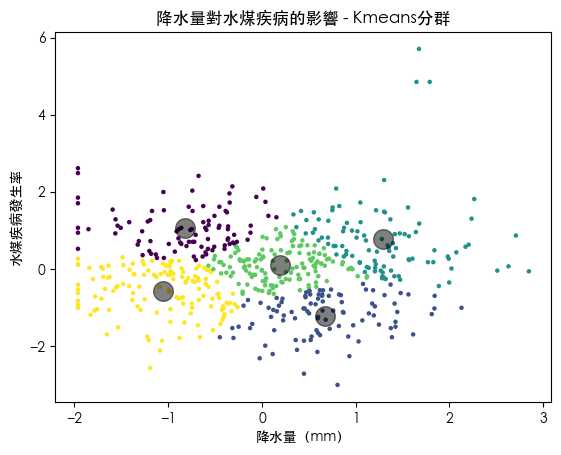

In [64]:
plt.scatter(X[:, 0], X[:, 1], c = kmeans.predict(X), s = 5, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.title('降水量對水煤疾病的影響 - Kmeans分群')
plt.xlabel('降水量（mm）')
plt.ylabel('水煤疾病發生率')
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);
plt.show()